In [1]:
import pandas as pd
import numpy as np
#실제 그래프를 그릴 수 있는 서브 함수
import matplotlib.pyplot as plt
import seaborn as sns

#경고표시 생략(일시적으로 생략하는게 좋음) 
import warnings
warnings.filterwarnings(action='ignore')

#한글폰트 지정 
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

# 머신러닝을 위한 모듈 
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
가장 중요한 변수를 알아서 가져옴 
필요한 데이터를 스스로 수집 
32X32X3 3은 RGB

SyntaxError: invalid syntax (Temp/ipykernel_25188/2961494756.py, line 1)

## 1. 기본 예제

### (1) 샘플 1 

+ 3 * 3 * 1 * 1 이미지 준비
+ 2 * 2 * 1 필터 준비

(1, 3, 3, 1)


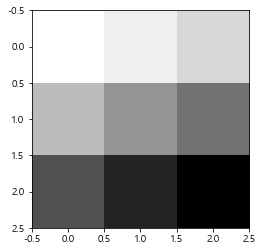

In [3]:
image = np.array([[ [[1],[2],[3]],
                [[4],[5],[6]],
                [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3),cmap='Greys')

(2, 2, 1, 1)

(1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


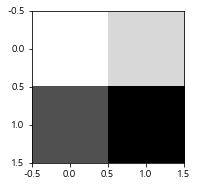

In [4]:
# 필터 = 가중치
# 패딩 = 이미지가 작아지는 것을 방지하는 것 
filter = tf.constant([[ [[1.]],[[1.] ]],
                      [[[1.]],[[1.]]]])
print(filter.shape)

conv2d= tf.nn.conv2d(image, filter, strides=[1,1,1,1],padding='VALID') # 처음과 끝은 무조건 1 ,padding='VALID' --> 패딩 안한다
sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img =np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1)
    plt.imshow(one_img.reshape(2,2),cmap='Greys')

(2, 2, 1, 1)
(1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


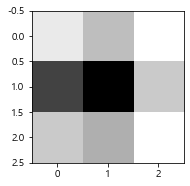

In [5]:
##### padding을 이용한 Convolution Layer 추출 
filter = tf.constant([[ [[1.]],[[1.] ]],
                      [[[1.]],[[1.]]]])
print(filter.shape)

conv2d= tf.nn.conv2d(image, filter, strides=[1,1,1,1],padding='SAME') # 패딩 하겠다.
sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img =np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1)
    plt.imshow(one_img.reshape(3,3),cmap='Greys') # 이미지 크기는 그대로니까 
    # 이미지 크기는 바뀌지 않으면서 특징을 가져오는 
    # 패딩을 하는 것은 원본 이미지 크기와 동일하게 가겠다. 

+ 3개의 필터 사용 :2 * 2 * 1 * 3

(2, 2, 1, 3)
(1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


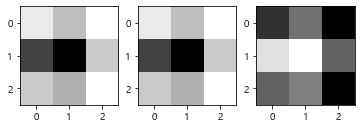

In [6]:
filter = tf.constant([[ [[1.,10,-1]],[[1.,10,-1] ]],
                      [[[1.,10,-1]],[[1.,10,-1]]]])
print(filter.shape)

conv2d= tf.nn.conv2d(image, filter, strides=[1,1,1,1],padding='SAME')
sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img =np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1)
    plt.imshow(one_img.reshape(3,3),cmap='Greys')


+ MaxPooling : 2 * 2 필터 
+ padding 없음 

In [7]:
image2 = tf.constant([[[[4],[3]],
                      [[2], [1]]]])
print(image2.shape)

pool=tf.nn.max_pool(image2,ksize=[1,2,2,1],strides =[1,1,1,1],padding='VALID')

sedd = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

(1, 2, 2, 1)

(1, 1, 1, 1)
[[[[4]]]]


In [8]:
image2 = tf.constant([[[[4],[3]],
                      [[2], [1]]]])
print(image2.shape)

pool=tf.nn.max_pool(image2,ksize=[1,2,2,1],strides =[1,1,1,1],padding='SAME')

sedd = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

(1, 2, 2, 1)
(1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]


## 2. 응용 예제 1:ㅡMNIST를 이용한 Simple CNN

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/mnist',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/mnist\t10k-images-idx3-ubyte.gz
Extracting data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(784,)


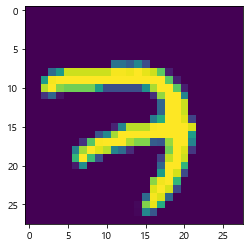

In [3]:
##### 데이터 확인 
img = mnist.train.images[0]
print(img.shape)

plt.imshow(img.reshape(28,28)) # 이차원으로 불러와야하니까 28,28 

In [4]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=[None,784])
y = tf.placeholder(tf.float32,shape=[None,10])


### (1) 첫번째 Convolution Layer

+ 필터
    - 크기 : 3 * 3 
    - 갯수 : 32 
    - 색상 수: 1

In [5]:
# 원본이미지 준비 
origin_X = tf.reshape(X,[-1,28,28,1])

# 필터 준비 
W1 = tf.Variable(tf.random_normal([3,3,1,32]))

# Convolution Layer : stride = 1칸 ,패딩 있음 
layer1 = tf.nn.conv2d(origin_X,W1,strides=[1,1,1,1],padding='SAME')
print(layer1)

layer1 = tf.nn.relu(layer1)
print(layer1)


Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)


### (2) 첫 번째 pooling

+ 필터크기 : 2*2 
+ stride : 2 
+ paddin 사용 

In [6]:
layer1 = tf.nn.max_pool(layer1,ksize=[1,2,2,1],strides =[1,2,2,1],padding='SAME')
print(layer1)


Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


### (3) 두 번째 Convolution Layer 

+ 필터 : 3*3
+ 갯수:,64
+ 색상수: 1

In [7]:
# 필터 준비 
W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev = 0.01))

# convolution layer
layer2 = tf.nn.conv2d(layer1,W2,strides=[1,1,1,1],padding = 'SAME')
print(layer2)

layer2 = tf.nn.relu(layer2)
print(layer2)


Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)


### (4) 두 번쨰: pooling 
+ 필터크기 :2*2 
+ stride : 2 
+ padding 사용 

In [8]:
layer2 = tf.nn.max_pool(layer2,ksize=[1,2,2,1],strides =[1,2,2,1],padding='SAME')
print(layer2)

Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


### (5) FC(Fully Connected : Dense layer


In [15]:
##### Hyper Parameter 준비
lr = 0.001
training_epochs = 20
batch_size = 500

##### Tensorflow Graph
train_X = tf.reshape(layer2, [-1, 7*7*64])

W = tf.Variable(tf.random_normal([7*7*64, 10]))
b = tf.Variable(tf.random_normal([10]))

# 비용
logit = tf.matmul(train_X, W) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y))

# 최저 비용
train = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

##### Tensor Graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], 
                        feed_dict={X:batch_x, y:batch_y})
        
        avg_cost += c / total_batch
        
    print(epoch+1, avg_cost)



1 1.4571835539557716
2 0.2671777654777874
3 0.1969143632460723
4 0.16362347000024527
5 0.1451091336255724
6 0.12317433086308564
7 0.11816075295209878
8 0.09765431325544012
9 0.09381195858798241
10 0.08725525946779687
11 0.07984087683937767
12 0.07364840260283513
13 0.06731156578118148
14 0.06120944099331444
15 0.05703341292048043
16 0.055351928274401205
17 0.05639814201065085
18 0.04729803199456496
19 0.04258143213492902
20 0.04101778311993587


In [16]:
preds=tf.argmax(logit,1)
correct=tf.equal(preds,tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

sess.run(accuracy,feed_dict={X:mnist.train.images, y:mnist.train.labels})

0.98945457

### (6) Deep & Wide FC
+ 레이어는 총 3개 사용, 입출력 갯수는 128개 사용 
+ Xavier 초기화 사용 
+ dropout 사용(70%)
+ traing_epochs : 15
+ batch_size : 100

In [9]:
##### Hyper Parameter 준비
lr = 0.001
training_epochs = 15
batch_size = 100
prob = tf.placeholder(tf.float32)

##### Tensorflow Graph
train_X = tf.reshape(layer2, [-1, 7*7*64])


# Layer1
W1 = tf.get_variable("W1", shape=[7*7*64, 128], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([128]))
logit1 = tf.matmul(train_X, W1) + b1
train_X = tf.nn.relu(logit1)
l1 = tf.nn.dropout(train_X, keep_prob=prob)

# Layer2
W2 = tf.get_variable("W2", shape=[128, 128], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([128]))
logit2 = tf.matmul(l1, W2) + b2
l2 = tf.nn.relu(logit2)
l2 = tf.nn.dropout(l2, keep_prob=prob)

# Layer3
W_out = tf.get_variable("W_out", shape=[128, 10], initializer=tf.contrib.layers.xavier_initializer())
b_out = tf.Variable(tf.random_normal([10]))
logit = tf.matmul(l2, W_out) + b_out

# 비용
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y))

# 최저 비용
train = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

##### Tensor Graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], 
                        feed_dict={X:batch_x, y:batch_y, prob:0.7})
        
        avg_cost += c / total_batch
        
    print(epoch+1, avg_cost)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



1 0.3210103149441157
2 0.09413264829665419
3 0.07038463924503464
4 0.054899519315751454
5 0.0449407199719413
6 0.03936510086525233
7 0.03528035564231688
8 0.03247851109023693
9 0.028888112105090513
10 0.02444640067898117
11 0.025419241714566436
12 0.022229327186254207
13 0.020268993018689802
14 0.017680415187079985
15 0.01599091523148343


In [12]:
preds=tf.argmax(logit,1)
correct=tf.equal(preds,tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

sess.run(accuracy,feed_dict={X:mnist.train.images, y:mnist.train.labels},prob:1.0)

SyntaxError: invalid syntax (Temp/ipykernel_15516/2072937192.py, line 5)

## 3. 응용 예제2 : 교통 표지만을 이용한 CNN

+ https://benchmark.ini.rub.de/gtsrb_dataset.html
        - GTSRB_Final_Test_Image.zip
         -  GTSRB_FinalTraing_Image.zip
         
+ simple cnn
    -이밎미지(2*32) ->Conv Layer1(Pooling) --->Conv Leter2(Pooling) -< FC

### (1) 이미지 전처리와 데이터 준비 

In [2]:
import glob
from skimage.color import rgb2lab
from skimage.transform import resize 
from collections import namedtuple
np.random.seed(101)

In [3]:
##### 상수 정의
N_CLASSES = 43
RESIZED_IMAGE = (32,32)

In [4]:
# 값의 수정을 방지하기 위해
Dataset=namedtuple('Dataset',['X','y']) #  상수해 벌이는

In [8]:
##### 이미지 크기 재조정하고 색상은 회색조로 변경, one-hot encoding

def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

def read_ppm(data, n_labels, resize_to):
    images = []
    labels = []
    
    for c in range(n_labels):
        full_path = data + "/" + format(c, '05d') + "/"
        
        for img_name in glob.glob(full_path + "*.ppm"):
            img = plt.imread(img_name).astype(np.float32)

            img = rgb2lab(img/255.0)[:, :, 0]
            
            img = resize(img, resize_to, mode="reflect")
            
            label = np.zeros((n_labels,), dtype=np.float32)
            label[c] = 1.0
            
            images.append(img.astype(np.float32))
            labels.append(label)
            
    return Dataset(X=to_tf_format(images), y=np.array(labels))
# --------------------------------------------------

ds = read_ppm("data/GTSRB/Final_Training/Images", N_CLASSES, RESIZED_IMAGE)
print(ds.X.shape)
print(ds.y.shape)

(39209, 32, 32, 1)
(39209, 43)


In [ ]:
jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


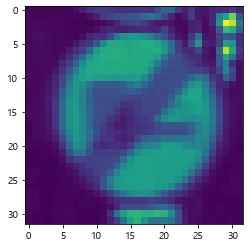

In [9]:
##### 전처리된 이미지 확인 

plt.imshow(ds.X[0,:,:,:].reshape(RESIZED_IMAGE))
print(ds.y[0,:])

# 마지막 이미지 가져오기 
plt.imshow(ds.X[-1,:,:,:].reshape(RESIZED_IMAGE))
print(ds.y[-1,:])

In [12]:
##### 훈련 데이터와 테스트 데이터의 분히 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(range(ds.X.shape[0]),ds.y,
                                                 test_size=.25, random_state=101)

#이렇게 하면 조금 문제가 있음
print(len(X_train),len(X_test))
type(X_train)
X_train.shape#--> 배열로 바꿔야하는 번거로움이 있음

29406 9803


AttributeError: 'list' object has no attribute 'shape'

In [13]:
np.array(X_train).shape# 이건 또 1차원이야;; 4차원으로 바꿔줘야 함

(29406,)

In [19]:
# 일단 훈련 데이터만 
idx_train,idx_test = train_test_split(range(ds.X.shape[0]),test_size=.25, random_state=101)
print(len(idx_train))
print(idx_train[:10])

X_train = ds.X[idx_train,:,:,:]
print(X_train.shape)

# test 데이터 
X_test = ds.X[idx_test,:,:,:]
print(X_test.shape)

# y 데이터 
y_train = ds.y[idx_train,:]
print(y_train.shape)

y_test = ds.y[idx_test,:]
print(y_test.shape)

29406
[271, 23055, 34387, 28229, 26437, 3760, 30266, 11625, 24743, 6505]
(29406, 32, 32, 1)
(9803, 32, 32, 1)
(29406, 43)
(9803, 43)


### (2)  훈련을 위한 함수 준비 

In [24]:
##### 미니 배치 준비 

def minibatcher(X,y, batch_size, shuffle):
    # 검증을 해봐야 함. x,y 데이터 갯수가 같아야 함. 
    assert X.shape[0] == y.shape[0]
    
    n_samples = X.shape[0]
    
    if shuffle:
        idx = np.random.permutation(n_samples)
    else:
        idx = list(range(n_samples))
    
    for i in range(int(np.ceil(n_samples/batch_size))):
        from_idx = i *batch_size
        to_idx = (i+1) * batch_size
        
        yield X[idx[from_idx:to_idx],:,:,:],y[idx[from_idx:to_idx],:]
    

In [25]:
##### 미니 배치 테스트 코드
for i in minibatcher(X_train,y_train, 10000,True):
    print(i[0].shape,i[1].shape)

(10000, 32, 32, 1) (10000, 43)
(10000, 32, 32, 1) (10000, 43)
(9406, 32, 32, 1) (9406, 43)


In [59]:
# W1 = tf.get_variable("W1", shape=[7*7*64, 128], initializer=tf.contrib.layers.xavier_initializer())
# b1 = tf.Variable(tf.random_normal([128]))
# logit1 = tf.matmul(train_X, W1) + b1

def fc_no_activation_layer(in_tensors, n_units):
    W = tf.get_variable("fc_W", [in_tensors.get_shape()[1], n_units], 
                       initializer=tf.contrib.layers.xavier_initializer())
    
    b = tf.get_variable("fc_b", [n_units], initializer=tf.constant_initializer(0.0))
    
    return tf.matmul(in_tensors, W) + b

In [60]:
def fc_layer(in_tensors, n_units):
    return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors, n_units))

In [61]:
def conv_layer(in_tensors, kernel_size, n_units):
    W = tf.get_variable("conv_W", [kernel_size, kernel_size, in_tensors.get_shape()[3], n_units], 
                       initializer=tf.contrib.layers.xavier_initializer())
    
    b = tf.get_variable("conv_b", [n_units], initializer=tf.constant_initializer(0.0))
    
    conv = tf.nn.conv2d(in_tensors, W, [1, 1, 1, 1], "SAME")
    
    return tf.nn.leaky_relu(conv + b)

In [62]:
def maxpool_layer(in_tensors, sampling):
    return tf.nn.max_pool(in_tensors, [1, sampling, sampling, 1], 
                          [1, sampling, sampling, 1], "SAME")

In [63]:
def dropout(in_tensors, keep_proba, is_training):
    return tf.cond(is_training, lambda:tf.nn.dropout(in_tensors, keep_proba), lambda:in_tensors)

### (3) Model 구현 

+ Specification
    - 2차원 Convolutin 5*5,32  필러 
    - 2차원 Convolutin 5*5,64  필러 
    - 평면화 계층(Flat Layer)
    - Full Connected Layer,1024개의 unut
    - Dropdout 40%
    - softmax
    

In [64]:
def model(in_tensors, is_training):
    # First Layer : 5*5 2d convolution layer, 32 filter, 2x maxpool, 20% dropout
    with tf.variable_scope("L1"):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
        l1_out = dropout(l1, 0.8, is_training)
        
    # Second Layer : 5*5 2d convolution layer, 64 filter, 2x maxpool, 20% dropout
    with tf.variable_scope("L2"):
        l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
        l2_out = dropout(l2, 0.8, is_training)
        
    # Flat Layer
    with tf.variable_scope("Flatten"):
        l2_out_flat = tf.layers.flatten(l2_out)
        
    # FC Layer, 1024 neurons, 40% dropout
    with tf.variable_scope("L3"):
        l3 = fc_layer(l2_out_flat, 1024)
        l3_out = dropout(l3, 0.6, is_training)
        
    # out
    with tf.variable_scope("out"):
        out_tensors = fc_no_activation_layer(l3_out, N_CLASSES)
        
    return out_tensors
        
    

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

def train_model(X_train, y_train, lr, max_epochs, batch_size):
    in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None, RESIZED_IMAGE[0], 
                                                           RESIZED_IMAGE[1], 1))
    in_y_tensors_batch = tf.placeholder(tf.float32, shape=(None, N_CLASSES))
    is_training = tf.placeholder(tf.bool)
    
    logit = model(in_X_tensors_batch, is_training)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                    labels=in_y_tensors_batch))
    train = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(max_epochs):
            print("Epoch=", epoch)
            tf_scores = []
            
            for mb in minibatcher(X_train, y_train, batch_size, shuffle=True):
                _, c = sess.run([train, cost], feed_dict={in_X_tensors_batch:mb[0],
                                                         in_y_tensors_batch:mb[1],
                                                         is_training:True})
                tf_scores.append(c)
                
            print("train loss score=", np.mean(tf_scores))
            
        # 훈련이 끝나고 난 후 테스트
        print("TEST SET PERFORMANCE")
        
        out_y_pred = tf.nn.softmax(logit)
        y_test_pred, test_cost = sess.run([out_y_pred, cost], feed_dict={in_X_tensors_batch:X_test,
                                                         in_y_tensors_batch:y_test,
                                                         is_training:False})
        
        print("test_loss_score=", test_cost)
        y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
        y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
        print(classification_report(y_test_true_classified, y_test_pred_classified))

In [66]:
tf.reset_default_graph()
train_model(X_train, y_train, 0.001, 10, 256)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Epoch= 0
train loss score= 3.7396832
Epoch= 1
train loss score= 0.6279049
Epoch= 2
train loss score= 0.28281513
Epoch= 3
train loss score= 0.17083934
Epoch= 4
train loss score= 0.12687491
Epoch= 5
train loss score= 0.092866965
Epoch= 6
train loss score= 0.07870735
Epoch= 7
train loss score= 0.06759294
Epoch= 8
train loss score= 0.060002577
Epoch= 9
train loss score= 0.057070546
TEST SE

In [46]:
X_train.shape

(29406, 32, 32, 1)

In [47]:
y_train.shape

(29406, 43)

In [ ]:
"""
1. 일부  cnn계층과 fc 계층을 추가해서 성능이 어떻게 변하는지 확인 
2. dropout의 비율을 변경해 보면서 결과가 과소적합 또는 과대적합이 되는지 확인 
3. 전체epoch 수와  batch_size 도 변경해서 결과 확인
4. 실제 테스트 이미지를 통해 사용할 수 있는 간단한 프로그램 작성 

"""